## Tim Nolan

Sorry I'm a bit late. *Never* buy and M1 ARM Mac until at least, like, 2025. There are all sorts of nightmares I have to face to get command line tools to work...not to mention all the third party apps I used to use which don't have a native M1 solution and stink when emulating. I had to reinstall basically my whole back end to get my R kernel working. I got it now, though :) Anyways...

# Homework 2: Data tables

This homework assignment is designed to get you comfortable loading and working with data tables.

You will need to download the **LexicalData_toclean.csv** file from the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides the reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not.

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. **Loading the Data (1 point)** 

Use the `setwd` and `read.csv` functions to load the data table from the **LexicalData_toclean.csv** file. Use the `head` function to look at the first few rows of the data. 

In [47]:
# INSERT CODE HERE
setwd("~/Documents/GradSchool/Coursework/S22/85-732/nolan_DSPN_S22/Homeworks/HW2")

LexicalData <- read.csv("./LexicalData_toclean.csv")

#Sanity check: starting dimensions of LexicalData for reference
dim(LexicalData)

head(LexicalData)

[1] 62610     7

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
1,157,1,1,710,browse,false,-0.437
2,67,1,1,"1,094",refrigerant,false,0.825
3,120,1,1,587,gaining,false,-0.645
4,21,1,1,984,cheerless,false,0.025
5,236,1,1,577,pattered,false,-0.763
6,236,2,1,715,conjures,false,-0.364


The **LexicalData_toclean.csv** file contains the variables `Sub_ID` (Subject ID), `Trial` (the trial number), `D_RT` (reaction time) and `D_Word` (the word they were responding to).

---
## 2. **Data Cleansing (4 points)**

There are three things we want to do to make this data more useable:
* Get rid of the commas in the reaction time values, and make this variable numeric (hint: check out the functions `gsub` and `as.numeric`).
* Get rid of rows where the reaction times are missing (hint: you can use the `filter` function from `tidyverse`, but you'll need to load the library).
* Make sure all of the reaction times are positive. 

Write code that will copy the data to a new variable and make the above changes. 

In [48]:
# INSERT CODE HERE
#0. Copy LexicalData to LexicalData_clean (not clean yet...)
LexicalData_clean <- LexicalData

#1. Get rid of the commas in D_RT and convert to numeric
LexicalData_clean$D_RT <- as.numeric(gsub(',','',LexicalData_clean$D_RT))

#2. Filter NA/empty D_RT rows
LexicalData_clean <- LexicalData_clean[!(is.na(LexicalData_clean$D_RT)),]

#3. Make sure D_RT > 0 everywhere
range(LexicalData_clean$D_RT)

[1]    3 3994

For each of the three actions above, is it addressing a data anomaly (as described in the Müller reading)? If so, name the *type* of anomaly it's addressing. 

* **First action: Get rid of the commas in D_RT and convert to numeric.** First, the commas represent syntactical irregularies in _D\_RT_, in that the formatting for values < 1000 differ from those > 1000 due to the comma. Second, the starting datatype is a string, not a numeric; this is a form of syntactical domain format errors, in that you can't perform numeric computations on a seemingly numeric variable.

* **Second action: Filter NA/empty D_RT rows.** This is a coverage error. Reaction time _must_ definitionally be some value > 0. These represent values missed during data collection.

* **Third action: Make sure D_RT > 0 everywhere** We are ensuring semantic integrity constraints are indeed in check.

---
## 3. **Data Manipulation with Tidyverse (4 points)**

Now let's use `tidyverse` functions to play around with this data a bit. Use the piping operator (`%>%`) in both of these code cells. 

First, let's get some useful summary **statistics** using `summarise`. Output a table that tells us how many observations there are in the data set, as well as the mean and standard deviation of the reaction times.

In [49]:
# INSERT CODE HERE
library(tidyverse)

#First, instantiate the summary table
LexicalData_summary <- LexicalData_clean

#Use piping function
LexicalData_summary %>%
    summarize(nObs = n(),mean_RT = mean(D_RT),sd_RT = sd(D_RT))

nObs,mean_RT,sd_RT
<int>,<dbl>,<dbl>
62607,807.2667,377.4396


Now, we'll use `mutate` to re-number the trials, starting from 0 instead of 1. Make a new variable that is equal to the `Trial` variable minus one. 

In [56]:
# INSERT CODE HERE
library(tidyverse)

#Use piping function
LexicalData <- LexicalData_clean %>% mutate(TrialShift = Trial - 1)

LexicalData

,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,TrialShift
,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,157,1,1,710,browse,false,-0.437,0
2,67,1,1,1094,refrigerant,false,0.825,0
3,120,1,1,587,gaining,false,-0.645,0
4,21,1,1,984,cheerless,false,0.025,0
5,236,1,1,577,pattered,false,-0.763,0
6,236,2,1,715,conjures,false,-0.364,1
7,236,5,1,826,censorship,false,-0.043,4
8,236,6,1,928,beckon,false,0.251,5
9,236,8,1,1047,superscribe,false,0.595,7


---
## 4. **Plotting Data (1 point)**

Use the `plot()` function to visualize the data, in a way that helps you see if there's a relationship between `D_RT` and your new trial variable.

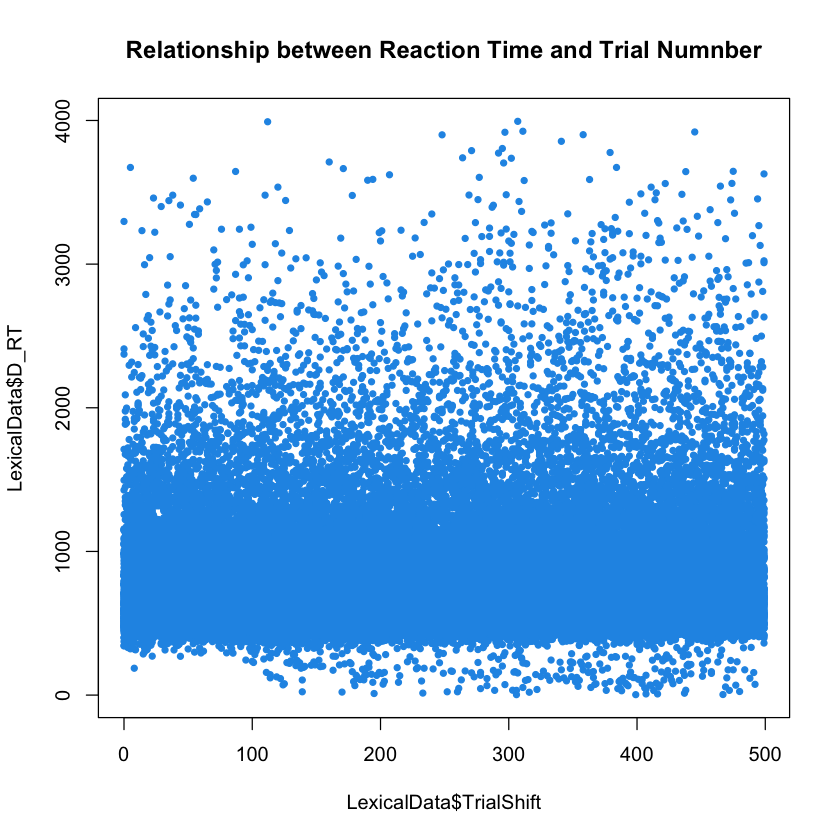

In [62]:
# INSERT CODE HERE
library(tidyverse)

plot(x=LexicalData$TrialShift,
     y=LexicalData$D_RT,
     pch = 20,
     col=4,
     main="Relationship between Reaction Time and Trial Numnber")

That's all for Homework 2! When you are finished, save the notebook as Homework2.ipynb, push it to your class GitHub repository (the one you made for Homework 1) and send the instructors a link to your notebook via Canvas. You can send messages via Canvas by clicking "Inbox" on the left and then pressing the icon with a pencil inside a square.

**DUE:** 5pm EST, Feb 14, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 

No :)